# Embossing (Kabartma)

https://abdulsamet-ileri.medium.com/g%C3%B6r%C3%BCnt%C3%BC-filtrelerini-uygulama-ve-kenarlar%C4%B1-alg%C4%B1lama-21d42f194db4

* Görüntü kabartması, bir görüntünün her pikselinin, orijinal görüntüdeki light/dark sınırlara bağlı olarak, bir highlight(vurgu) veya shadow(gölge) ile değiştirildiği bir bilgisayar grafiği tekniğidir. 
* Düşük kontrastlı alanlar gri bir arka planla değiştirilir. 
* Belirli bir bölgede çok fazla kontrast varsa, kabartma yaptığımız yöne bağlı olarak bunu beyaz bir pikselle (vurgu) veya karanlık bir pikselle (gölge) değiştireceğiz. 
* Sonuç olarakta, bu filterin bir görüntüye uygulanması sonucu ortaya çıkan output (filtered image), original görüntüdeki her konumun renk değişimi ifade edecektir.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
bgr = cv2.imread('./images/circle.jpg')

In [5]:
# kuzeyden güneye
kernel_emboss_1 = np.array([[0,-1,0], [0,0, 0], [0,1,0]])
# doğudan batıya
kernel_emboss_2 = np.array([[0,0,0], [1,0,-1], [0,0,0]])

vertical_emboss = cv2.filter2D(bgr, -1, kernel_emboss_1) + 128
horizontal_emboss = cv2.filter2D(bgr, -1, kernel_emboss_2) + 128

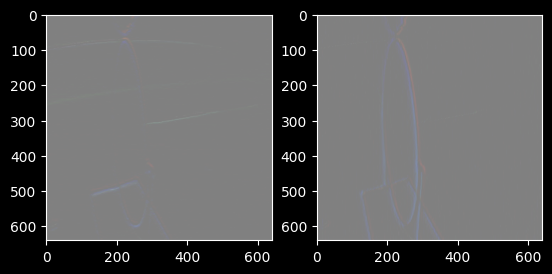

In [6]:
plt.subplot(121)
plt.imshow(cv2.cvtColor(vertical_emboss,cv2.COLOR_BGR2RGB))

plt.subplot(122)
plt.imshow(cv2.cvtColor(horizontal_emboss,cv2.COLOR_BGR2RGB))

plt.show()

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*tiOmM8oeab49ms5c3CKxRw.png)

* Matris üzerinde -1 tarafından(başlangıç noktası) +1 tarafına(bitiş noktası) doğru bir doğru çizdiğinizi hayal edin.

![](https://miro.medium.com/v2/resize:fit:750/format:webp/1*ZEqWZxSOAfDJ9CY4umz0oA.png)

* Kullandığımız kernellerden görebildiğimiz gibi, mevcut piksel değerini sadece belirli bir yöndeki komşu piksel değerlerinin farkı ile değiştiriyoruz.

* Kernel matrislerinin toplamı sıfıra düştüğünden, çıktı görüntüsü neredeyse tamamen siyah bir arka plana sahiptir ve sadece kenarlar görünür. Bu durumuda her piksele ekstra 128 (0–255 yarısı) değerini ekleyerek gri tonlu bir arka plan oluşturulur.